In [9]:
import requests

In [148]:
def user_recommendations(userId, topn):
    params = {
        'alsId': '8bbeb560-b5ef-11e4-9371-231becfad413',
        'Api-Key': '672a95b2369d9f7e596f1a7737c69460',
        'userId': userId,
        'max': topn}
    api_pre_url_template = 'http://api.data-pre.schibsted.io:2107/aftenposten/user/recommend'
    return requests.get(api_pre_url_template, params).json()['recommendations']

def user_rec_articles(userId, topn):
    return [(rec['id'], rec['score']) for rec in user_recommendations(userId, topn)]

userId = 6134214
topn = 5
user_rec_articles(userId, topn)

[(u'8260373', 0.032073087746622604),
 (u'8257325', 0.13348561894546362),
 (u'8259370', 0.015241522879591969),
 (u'8256970', 0.040795325677716925),
 (u'8237474', 0.02102413183390936)]

In [149]:
from collections import Counter
from itertools import chain
n_calls = 500
topn = 5

c = Counter(chain.from_iterable(user_rec_articles(userId, topn) for _ in range(n_calls)))
print(len(c))

50


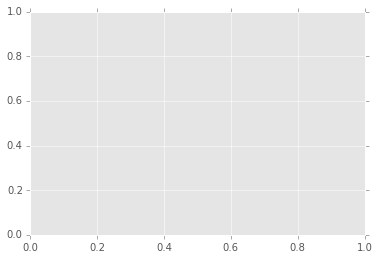

In [141]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()
color_cycle = ax._get_lines.color_cycle
blue_color = next(color_cycle)
red_color = next(color_cycle)

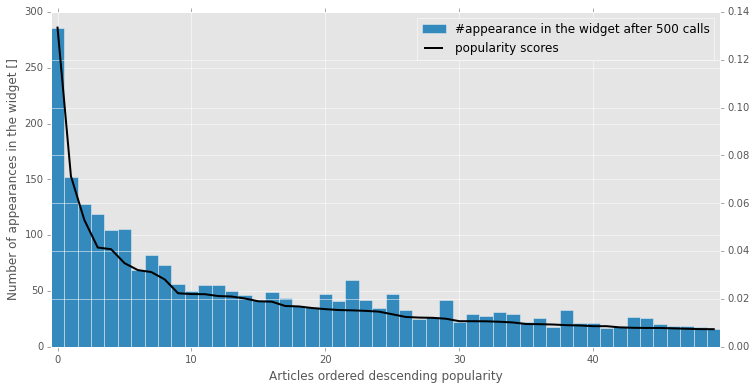

In [170]:
import operator
by_score = lambda c: c[0][1]
sorted_counts = sorted(c.items(), key=by_score, reverse=True)

articles, scores, counts = zip(*[(a, score, count) for ((a, score), count) in sorted_counts])

def plot_counts(articles, scores, counts, bar_color=red_color):
    xs = range(len(counts))

    plt.figure(figsize=(12, 6))

    b = plt.bar(xs, counts, width=1, align='center', color=bar_color)
    plt.xlabel('Articles ordered descending popularity')
    plt.ylabel('Number of appearances in the widget []')
    ax = plt.twinx()
    l = ax.plot(xs, scores, 'k-', linewidth=2)
    #plt.xticks(xs, articles, size=6)
    plt.xticks()
    plt.xlim((-.5, xs[-1] + .5));
    plt.legend([b, l[0]], ['#appearance in the widget after 500 calls', 'popularity scores']);

plot_counts(articles, scores, counts)

# No randomization

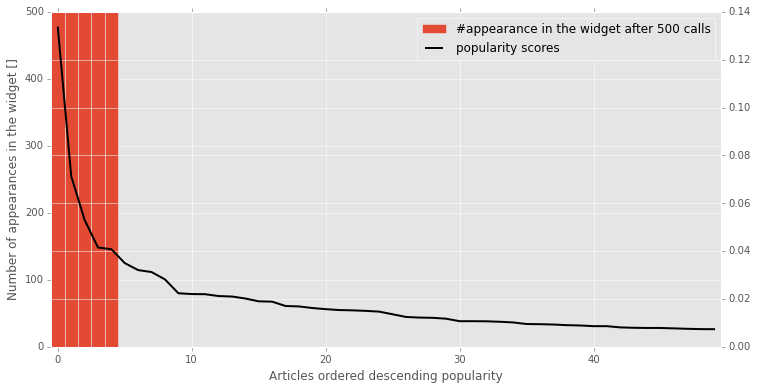

In [168]:
topn = 5
articles, scores, counts
no_rand_counts = [n_calls] * topn + [0] * (len(counts) - topn)

plot_counts(articles, scores, no_rand_counts, bar_color=blue_color)